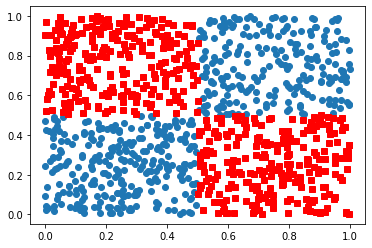

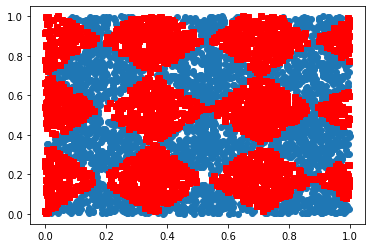

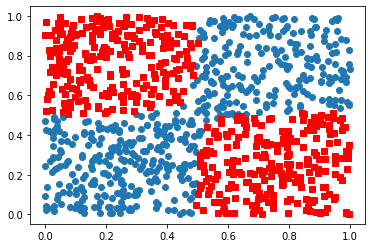

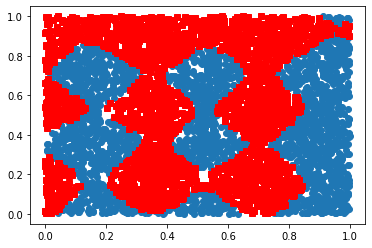

In [23]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors.kde import KernelDensity
from math import log

def gen_cb(N, a, alpha): 
    """
    N: number of points on the checkerboard
    a: width of the checker board (0<a<1)
    alpha: rotation of the checkerboard in radians 
    """
    d = np.random.rand(N, 2).T
    d_transformed = np.array([d[0]*np.cos(alpha)-d[1]*np.sin(alpha), 
                              d[0]*np.sin(alpha)+d[1]*np.cos(alpha)]).T
    s = np.ceil(d_transformed[:,0]/a)+np.floor(d_transformed[:,1]/a)
    lab = 2 - (s%2)
    data = d.T
    return data, lab 

n1=1000
X1, y1 = gen_cb(n1, .5, 0)
plt.plot(X1[np.where(y1==1)[0], 0], X1[np.where(y1==1)[0], 1], 'o')
plt.plot(X1[np.where(y1==2)[0], 0], X1[np.where(y1==2)[0], 1], 's', c = 'r')

n2=5000
X2, y2 = gen_cb(n2, .25, 3.14159/4)
plt.figure()
plt.plot(X2[np.where(y2==1)[0], 0], X2[np.where(y2==1)[0], 1], 'o')
plt.plot(X2[np.where(y2==2)[0], 0], X2[np.where(y2==2)[0], 1], 's', c = 'r')

#training X1, y1
kde1 = KernelDensity(bandwidth=0.1, kernel='gaussian')
kde1.fit(X1[np.where(y1==1)])
kde2 = KernelDensity(bandwidth=0.1, kernel='gaussian')
kde2.fit(X1[np.where(y1==2)])

#testing X1, y1
nb1=len(X1[np.where(y1==1)])
nr1=len(X1[np.where(y1==2)])
btest1=kde1.score_samples(X1)+(log(nb1)-log(n1))
rtest1=kde2.score_samples(X1)+(log(nb1)-log(n1))
k=0
while k<len(btest1):
    if btest1[k]>rtest1[k]:
        y1[k]=1
    else:
        y1[k]=2
    k=k+1
plt.figure()
plt.plot(X1[np.where(y1==1)[0], 0], X1[np.where(y1==1)[0], 1], 'o')
plt.plot(X1[np.where(y1==2)[0], 0], X1[np.where(y1==2)[0], 1], 's', c = 'r')


#training X2, y2
kde3 = KernelDensity(bandwidth=0.1, kernel='gaussian')
kde3.fit(X2[np.where(y2==1)])
kde4 = KernelDensity(bandwidth=0.1, kernel='gaussian')
kde4.fit(X2[np.where(y2==2)])

#testing X2, y2
nb2=len(X2[np.where(y2==1)])
nr2=len(X2[np.where(y2==2)])
btest2=kde3.score_samples(X2)+log(nb2/n2)
rtest2=kde4.score_samples(X2)+log(nb2/n2)
k=0
while k<len(btest2):
    if btest2[k]>rtest2[k]:
        y2[k]=1
    else:
        y2[k]=2
    k=k+1
plt.figure()
plt.plot(X2[np.where(y2==1)[0], 0], X2[np.where(y2==1)[0], 1], 'o')
plt.plot(X2[np.where(y2==2)[0], 0], X2[np.where(y2==2)[0], 1], 's', c = 'r')


